In [1]:
import numpy as np

import scipy.signal

import matplotlib.pyplot as plt

import librosa

import librosa.display


In [2]:
def show_detail(y):
    # y : shape [22050,]을 갖는 파형
    
    '''
    y 앞에서부터 2048 samples 보여주기
    '''
    print('waveform', 'shape :', y.shape)
    plt.figure(figsize=[18, 2])
    plt.plot(y[:2048])
    plt.show()

    '''
    STFT(short time fourier transform) 수행 후 magnitude값만 취하기
    '''
    spec = librosa.core.stft(y, n_fft=2048, hop_length=512).T / 2048 # n_fft로 나누어 normalizing
    spec = np.abs(spec)

    '''
    spectrum = spectrogram 단면
    '''
    print('spectrum', 'shape :', spec[10].shape)
    plt.figure(figsize=[18, 3])
    plt.plot(spec[10])
    plt.show()
    
    '''
    log-spectrum
    '''
    print('log-spectrum', 'shape :', spec[10].shape)
    plt.figure(figsize=[18, 3])
    plt.plot(20 * np.log10(spec[10]))
    plt.show()

    '''
    spectrogram
    '''
    print('spectrogram', 'shape :', spec.shape)
    plt.figure(figsize=[18, 5])
    librosa.display.specshow(librosa.amplitude_to_db(spec.T, ref=np.max), fmax='11050', y_axis='linear', x_axis='time')
    plt.show()


### pure sine wave

waveform shape : (22050,)


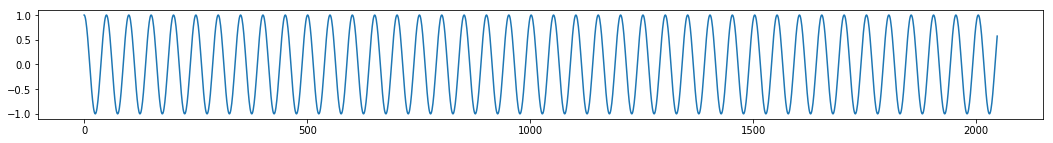

spectrum shape : (1025,)


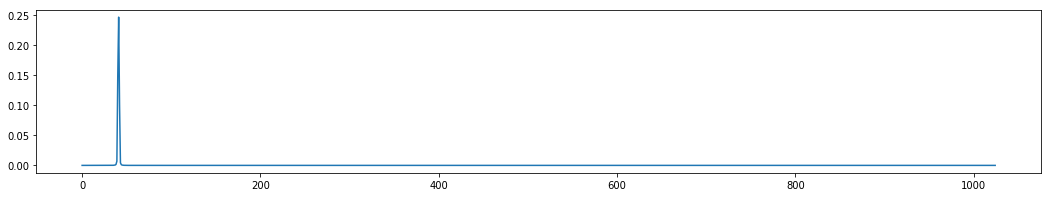

log-spectrum shape : (1025,)


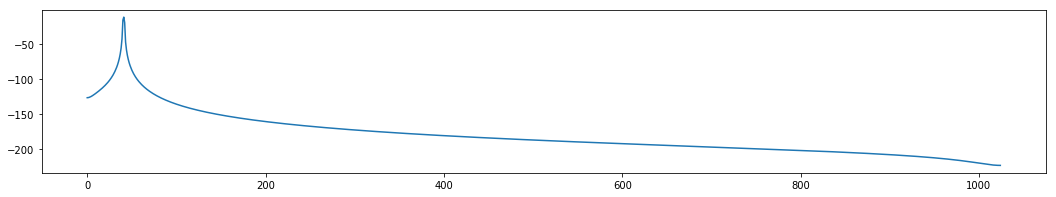

spectrogram shape : (44, 1025)


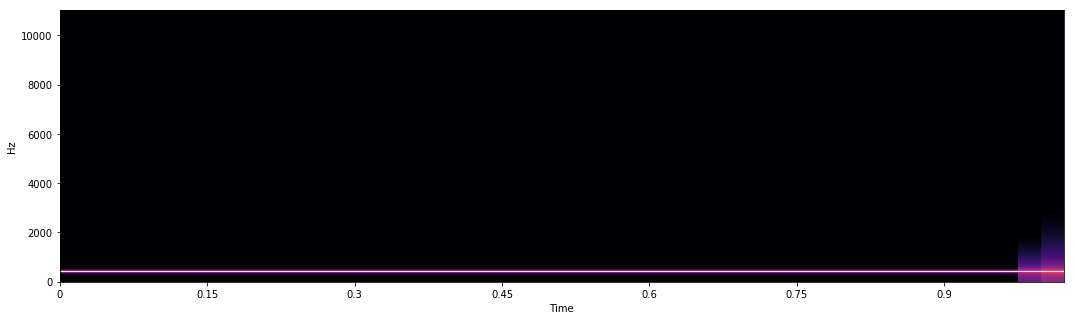

In [3]:
# N구간 내에서 k번 진동하는 파형 만들기
N = 22050
k = 440
n = np.linspace(0, N-1, N)
y = np.cos(2 * np.pi * k * n / N)

# 소리의 waveform, spectrum, spectrogram 보여주기
show_detail(y)

# wav 들어보기
import IPython.display as ipd
ipd.Audio(y, rate=22050)


#### 연습1. 22050구간 내에서 880, 1760, 3520번 진동하는 파형을 만들고 waveform, spectrum, spectrogram을 살펴보고, 22050 sample rate로 들어봅시다.

### 톱니파(sawtooth wave)

waveform shape : (22050,)


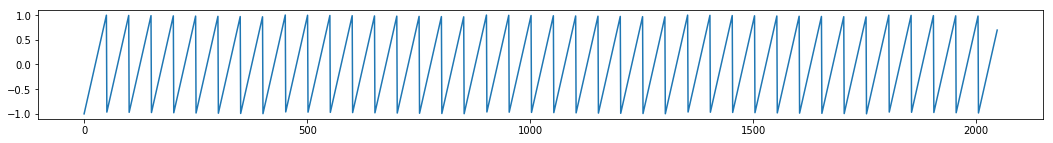

spectrum shape : (1025,)


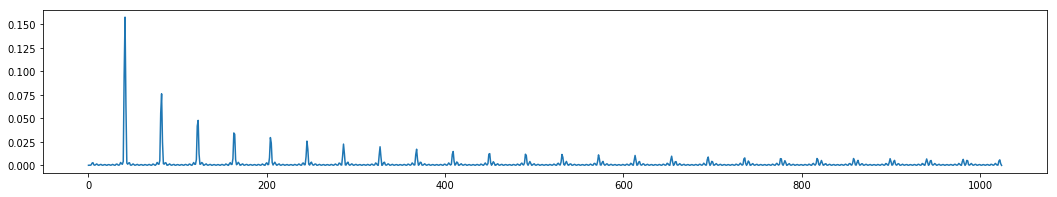

log-spectrum shape : (1025,)


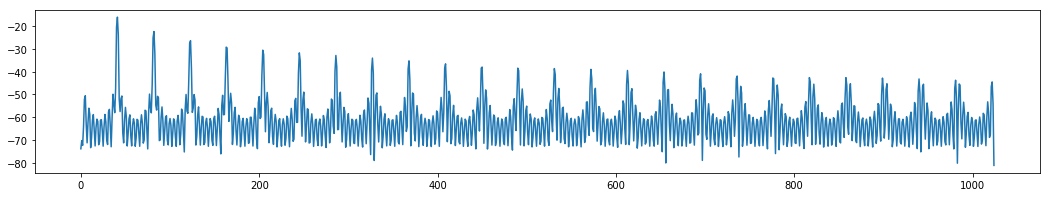

spectrogram shape : (44, 1025)


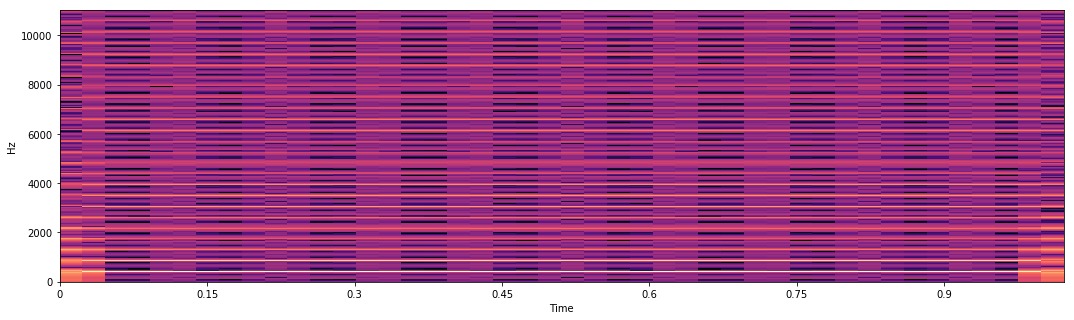

In [4]:
# N구간 내에서 k번 진동하는 파형 만들기
N = 22050
k = 440
n = np.linspace(0, N-1, N)
y = scipy.signal.sawtooth(2 * np.pi * k * n / N)

# 소리의 waveform, spectrum, spectrogram 보여주기
show_detail(y)

# wav 들어보기
import IPython.display as ipd
ipd.Audio(y, rate=22050)


### sin wave를 쌓아서 sawtooth wave 만들기, $sawtooth[n] = {2\over\pi}\sum_{i=1}^{\infty}(-1)^i{{\sin[2\pi ikn/N]}\over i}$

waveform shape : (22050,)


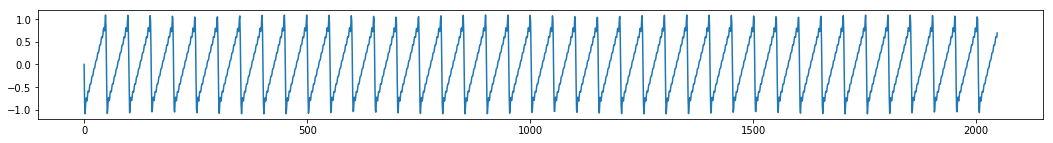

spectrum shape : (1025,)


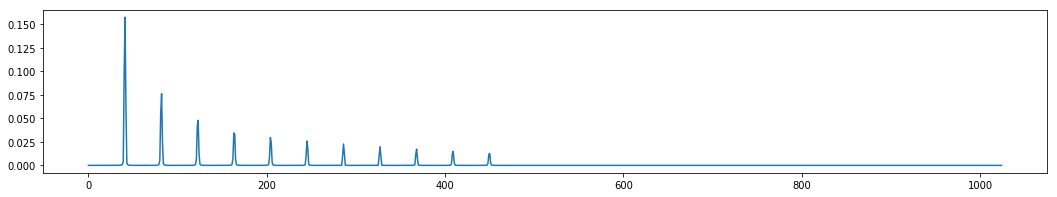

log-spectrum shape : (1025,)


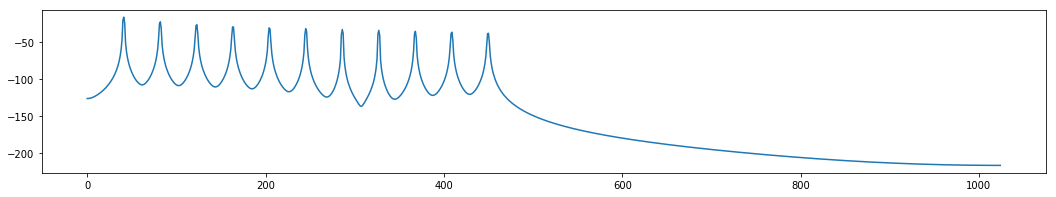

spectrogram shape : (44, 1025)


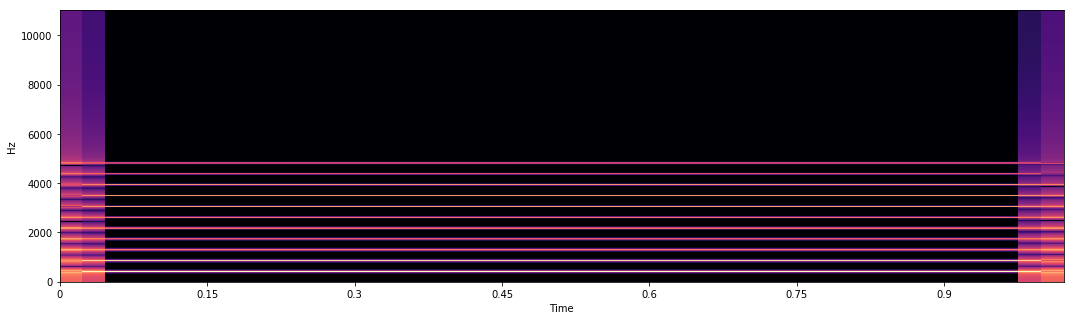

In [5]:
# N구간 내에서 k번 진동하는 파형 만들기
N = 22050
k = 440

# 배음 개수  
harmonics = 10

n = np.linspace(0, N-1, N)
y = -1 * np.sin(2 * np.pi * 1 * k * n / N)

# 1배음부터 차례대로 더함
for i in range(2, harmonics+2):
    y += (1/i) * (-1 ** i) * np.sin(2 * np.pi * i * k * n / N)
y *= 2/np.pi

# 소리의 waveform, spectrum, spectrogram 보여주기
show_detail(y)

# wav 들어보기
import IPython.display as ipd
ipd.Audio(y, rate=22050)


#### 연습2. scipy.signal.square를 이용해서 사각파를 만들고, 모양과 소리를 확인해봅시다.